# Testing Order of Growth

[Click here to run this chapter on Colab](https://colab.research.google.com/github/AllenDowney/DSIRP/blob/main/notebooks/timing.ipynb)

Analysis of algorithms makes it possible to predict how run time will grow as the size of a problem increases.
But this kind of analysis ignores leading coefficients and non-leading terms.
So the behavior for small and medium problems might not be what the analysis predicts.

To see how run time really behaves for a range of problem sizes, we can run the algorithm and measure.

To do the measurement, we'll use the [times](https://docs.python.org/3/library/os.html#os.times) function from the `os` module.

In [1]:
import os

def etime():
    """Measures user and system time this process has used.

    Returns the sum of user and system time."""
    user, sys, chuser, chsys, real = os.times()
    return user+sys

In [5]:
start = etime()
t = [x**2 for x in range(10000)]
end = etime()
end - start

0.0

Exercise: Use `etime` to measure the computation time used by `sleep`.

In [4]:
from time import sleep
start = etime()
sleep(1)
end = etime()
end - start

0.0

In [6]:
def time_func(func, n):
    """Run a function and return the elapsed time.

    func: function
    n: problem size, passed as an argument to func

    returns: user+sys time in seconds
    """
    start = etime()
    func(n)
    end = etime()
    elapsed = end - start
    return elapsed

One of the things that makes timing tricky is that many operations are too fast to measure accurately.

`%timeit` handles this by running enough times get a precise estimate, even for things that run very fast.

We'll handle it by running over a wide range of problem sizes, hoping to find sizes that run long enough to measure, but not more than a few seconds.


The following function takes a size, `n`, creates an empty list, and calls `list.append` `n` times.

In [7]:
def list_append(n):
    t = []
    [t.append(x) for x in range(n)]

`timeit` can time this function accurately.

In [8]:
%timeit list_append(10000)

475 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


But our `time_func` is not that smart.

In [9]:
time_func(list_append, 10000)

0.009999999999999787

Exercise: Increase the number of iterations until the run time is measureable.

In [10]:
time_func(list_append, 1000000)

0.1399999999999988

## List append

The following function gradually increases `n` and records the total time.

In [11]:
def run_timing_test(func, max_time=1):
    """Tests the given function with a range of values for n.

    func: function object

    returns: list of ns and a list of run times.
    """
    ns = []
    ts = []
    for i in range(10, 28):
        n = 2**i
        t = time_func(func, n)
        print(n, t)
        if t > 0:
            ns.append(n)
            ts.append(t)
        if t > max_time:
            break

    return ns, ts

In [12]:
ns, ts = run_timing_test(list_append)

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.0
65536 0.0
131072 0.009999999999999787
262144 0.030000000000001137
524288 0.030000000000001137
1048576 0.0799999999999983
2097152 0.21000000000000085
4194304 0.3699999999999992
8388608 0.7300000000000004
16777216 1.3800000000000008


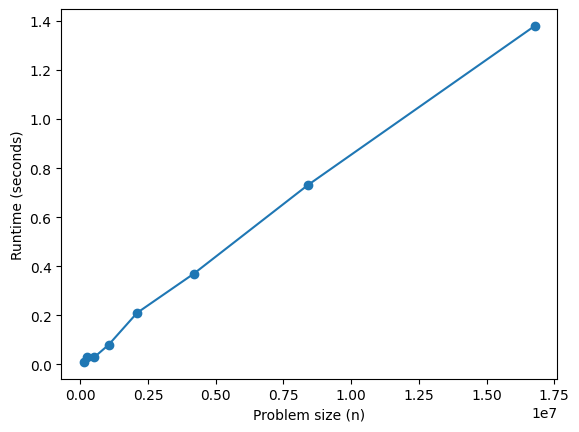

In [13]:
import matplotlib.pyplot as plt

plt.plot(ns, ts, 'o-')
plt.xlabel('Problem size (n)')
plt.ylabel('Runtime (seconds)');

This one looks pretty linear, but it won't always be so clear.
It will help to plot a straight line that goes through the last data point.

In [14]:
def fit(ns, ts, exp=1.0, index=-1):
    """Fits a curve with the given exponent.

    ns: sequence of problem sizes
    ts: sequence of times
    exp: exponent of the fitted curve
    index: index of the element the fitted line should go through

    returns: sequence of fitted times


    """
    # Use the element with the given index as a reference point,
    # and scale all other points accordingly.
    nref = ns[index]
    tref = ts[index]

    tfit = []
    for n in ns:
        ratio = n / nref
        t = ratio**exp * tref
        tfit.append(t)

    return tfit

In [15]:
ts_fit = fit(ns, ts)
ts_fit

[0.010781250000000006,
 0.021562500000000012,
 0.043125000000000024,
 0.08625000000000005,
 0.1725000000000001,
 0.3450000000000002,
 0.6900000000000004,
 1.3800000000000008]

The following function plots the actual results and the fitted line.

In [16]:
def plot_timing_test(ns, ts, label='', color='C0', exp=1.0, scale='log'):
    """Plots data and a fitted curve.

    ns: sequence of n (problem size)
    ts: sequence of t (run time)
    label: string label for the data curve
    color: string color for the data curve
    exp: exponent (slope) for the fitted curve
    scale: string passed to xscale and yscale
    """
    ts_fit = fit(ns, ts, exp)
    fit_label = 'exp = %d' % exp
    plt.plot(ns, ts_fit, label=fit_label, color='0.7', linestyle='dashed')
    plt.plot(ns, ts, 'o-', label=label, color=color, alpha=0.7)
    plt.xlabel('Problem size (n)')
    plt.ylabel('Runtime (seconds)')
    plt.xscale(scale)
    plt.yscale(scale)
    plt.legend()

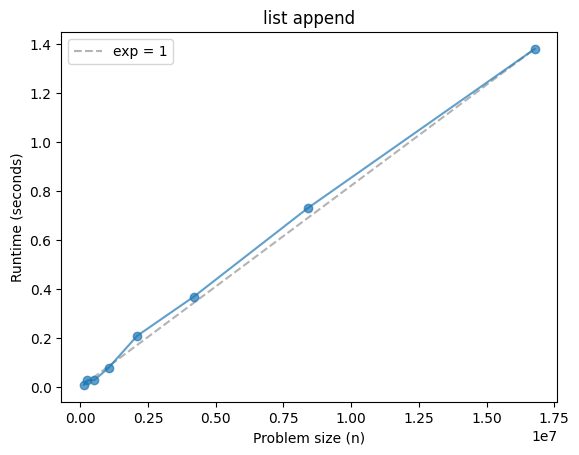

In [17]:
plot_timing_test(ns, ts, scale='linear')
plt.title('list append');

From these results, what can we conclude about the order of growth of `list.append`?

Before we go on, let's also look at the results on a log-log scale.

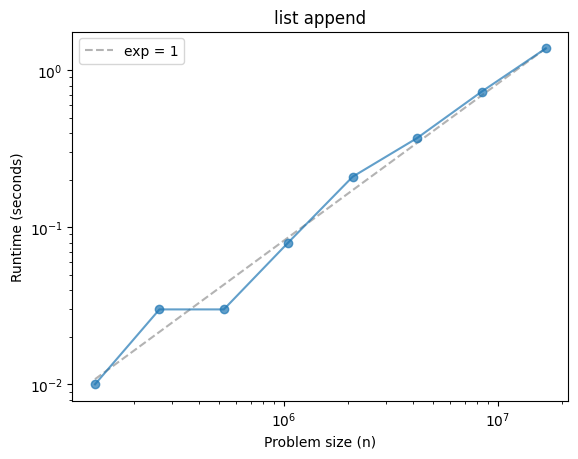

In [18]:
plot_timing_test(ns, ts, scale='log')
plt.title('list append');

Why might we prefer this scale?

## List pop

Now let's do the same for `list.pop` (which pops from the end of the list by default).

Notice that we have to make the list before we pop things from it, so we will have to think about how to interpret the results.

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.010000000000001563
32768 0.0
65536 0.0
131072 0.019999999999999574
262144 0.05000000000000071
524288 0.05999999999999872
1048576 0.14000000000000057
2097152 0.22999999999999687
4194304 0.6300000000000026
8388608 1.1000000000000014


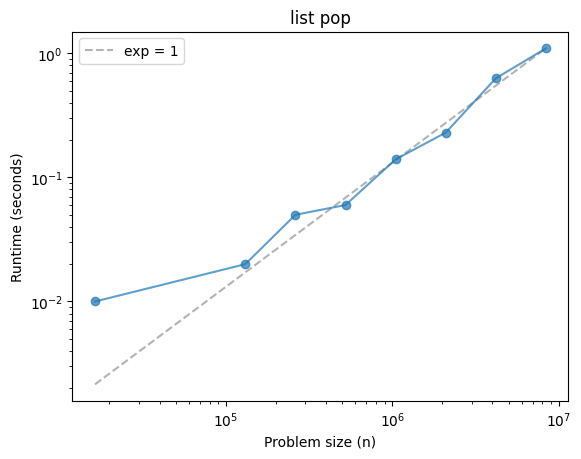

In [19]:
def list_pop(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.pop() for _ in range(n)]

ns, ts = run_timing_test(list_pop)
plot_timing_test(ns, ts, scale='log')
plt.title('list pop');

What can we conclude?

What about `pop(0)`, which pops from the beginning of the list?

Note: You might have to adjust `exp` to make the fitted line fit.

1024 0.0
2048 0.00999999999999801
4096 0.03999999999999915
8192 0.13000000000000256
16384 0.5799999999999983
32768 2.2699999999999996


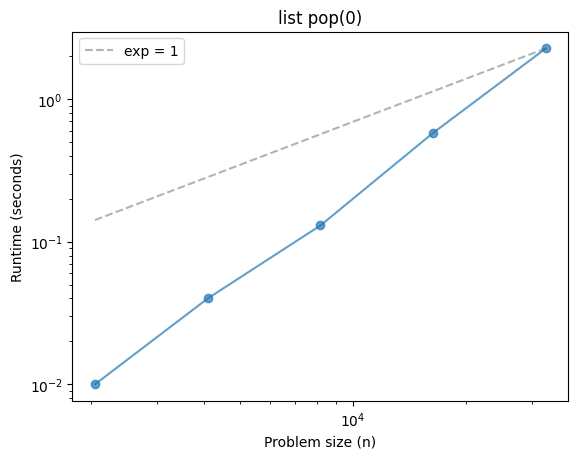

In [20]:
def list_pop0(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.pop(0) for _ in range(n)]

ns, ts = run_timing_test(list_pop0)
plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('list pop(0)');

## Searching a list

`list.index` searches a list and returns the index of the first element that matches the target.

What do we expect if we always search for the first element?

1024 0.0
2048 0.0
4096 0.0
8192 0.00999999999999801
16384 0.0
32768 0.0
65536 0.010000000000001563
131072 0.00999999999999801
262144 0.030000000000001137
524288 0.07000000000000028
1048576 0.129999999999999
2097152 0.3000000000000007
4194304 0.6300000000000026
8388608 1.1899999999999977


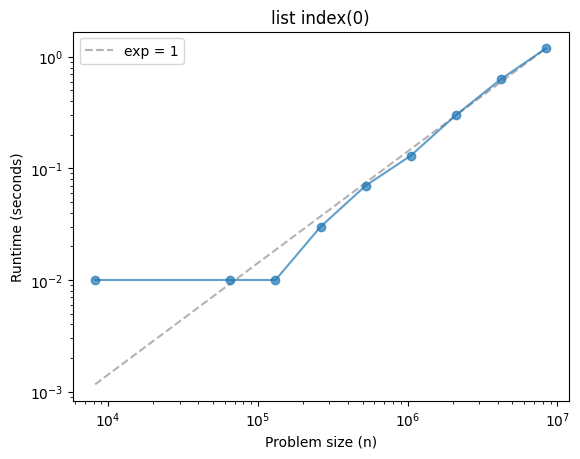

In [21]:
def list_index0(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.index(0) for _ in range(n)]

ns, ts = run_timing_test(list_index0)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('list index(0)');

What if we always search for the last element?

1024 0.00999999999999801
2048 0.060000000000002274
4096 0.21999999999999886
8192 0.9000000000000021
16384 5.329999999999998


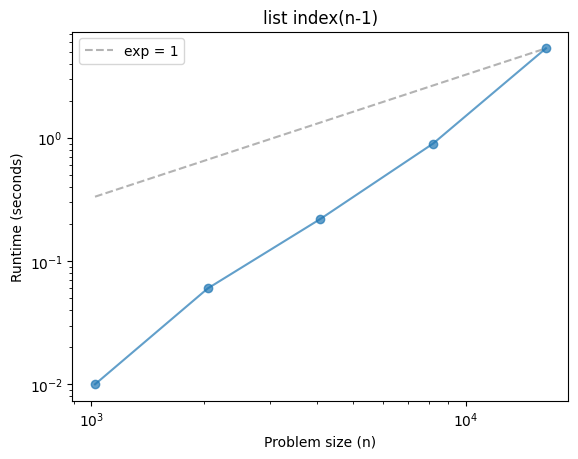

In [22]:
def list_index_n(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.index(n-1) for _ in range(n)]

ns, ts = run_timing_test(list_index_n)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('list index(n-1)');

## Dictionary add

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.0
65536 0.00999999999999801
131072 0.00999999999999801
262144 0.04000000000000625
524288 0.06999999999999318
1048576 0.15000000000000568
2097152 0.3299999999999983
4194304 0.6199999999999974
8388608 1.3100000000000023


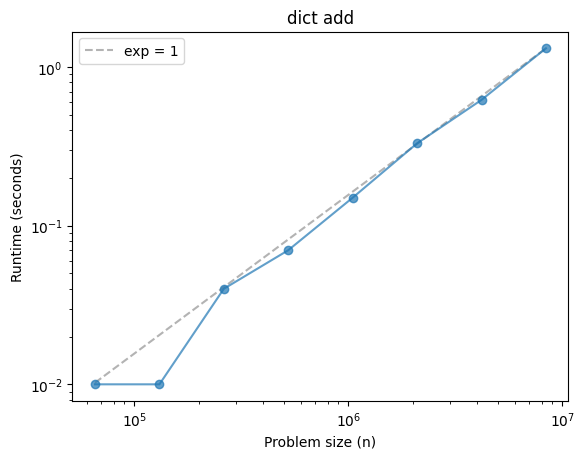

In [23]:
def dict_add(n):
    d = {}
    [d.setdefault(x, x) for x in range(n)]

ns, ts = run_timing_test(dict_add)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('dict add');

## Dictionary lookup

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.009999999999990905
65536 0.010000000000005116
131072 0.01999999999999602
262144 0.04000000000000625
524288 0.10000000000000142
1048576 0.21000000000000085
2097152 0.44999999999999574
4194304 0.9099999999999966
8388608 1.9000000000000057


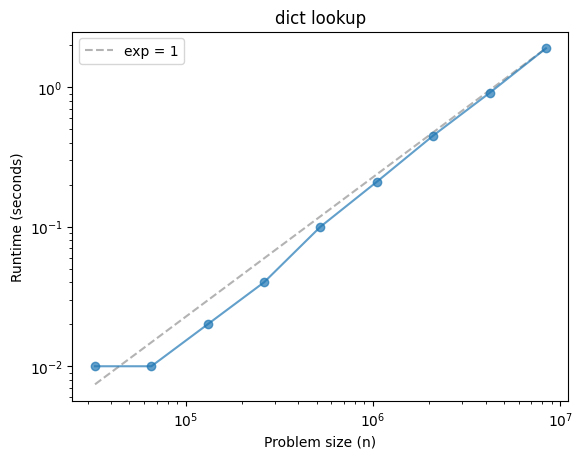

In [24]:
def dict_lookup(n):
    d = {}
    [d.setdefault(x, x) for x in range(n)]
    [d[x] for x in range(n)]

ns, ts = run_timing_test(dict_lookup)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('dict lookup');

This characteristic of dictionaries is the foundation of a lot of efficient algorithms!

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)